In [3]:
import networkx as nx
import random as rd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import math
import pandas as pd

In [4]:
File_Names = ['a3_b3_g2.1_e2_1.0_1', 'a3_b3_g2.1_e2_1.0_2', 'a3_b3_g2.1_e2_1.0_3', 'a3_b3_g2.1_e2_1.0_4', 'a3_b3_g2.1_e2_1.0_5']
g = globals()

files = len(File_Names)

for i in range(files):
    g[f"data{i+1}"] = np.loadtxt(f'D:\Daten mit Änderungen\Physik\Bachelorarbeit\Generated_Data\{File_Names[i]}.csv', delimiter=',')

In [5]:
# Splitting opinions in two
iter = 1000
N = 1000
for i in range(files):
    for j in range(2):
        g[f"data_{i+1}_op_{j+1}"] = np.zeros((N,iter))
        for k in range (iter):
            g[f"data_{i+1}_op_{j+1}"][k] = g[f"data{i+1}"][2*k + 1 + j]

Text(0, 0.5, 'Opinion 2')

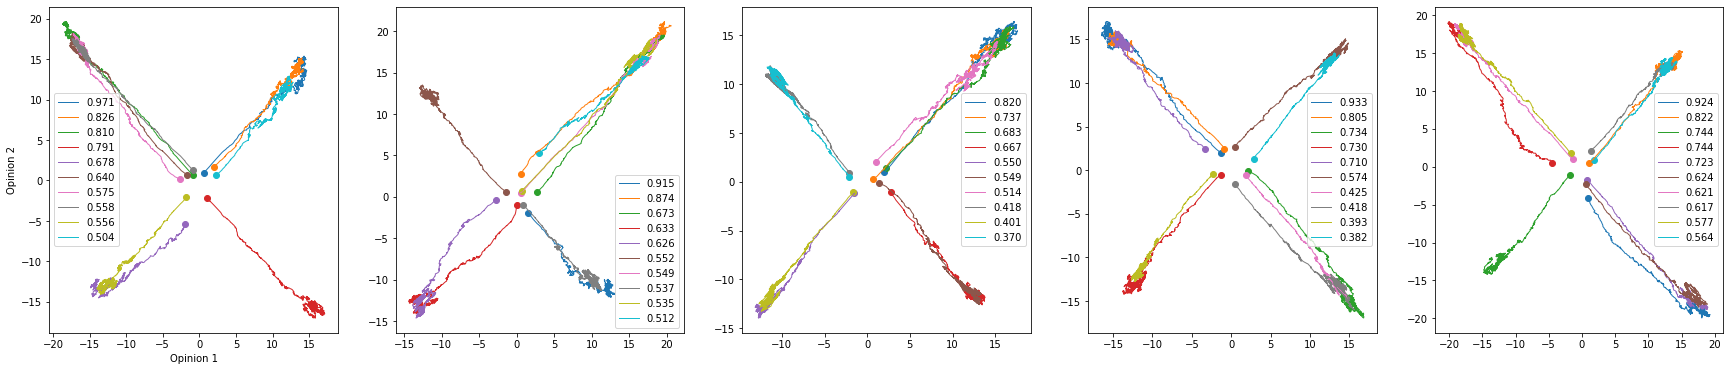

In [6]:
# Plotting flow profile for 10 most active agents
fig, ax = plt.subplots(1, files, figsize=(5*6,6))

for h in range(files):
    for i in range (10):
        # Finding most active agents by sorting
        act_arr = np.zeros((N,2))

        for j in range (N):
            act_arr[j][1] = g[f"data{h+1}"][0][j]
            act_arr[j][0] = j

        sort = np.flip(np.argsort(act_arr[:,1]))
        sort = (act_arr[sort])
        ax[h].plot(g[f"data_{h+1}_op_1"][:,int(sort[i][0])], g[f"data_{h+1}_op_2"][:,int(sort[i][0])], label=f"{sort[i][1]:.3f}", lw=1.0)
        ax[h].scatter(g[f"data_{h+1}_op_1"][0][int(sort[i][0])], g[f"data_{h+1}_op_2"][0][int(sort[i][0])])
    ax[h].legend()
ax[0].set_xlabel("Opinion 1")
ax[0].set_ylabel("Opinion 2")